In [21]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [22]:
mnist = tf.keras.datasets.mnist
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [23]:
x_train = tf.keras.utils.normalize(x_train , axis=1)
x_test = tf.keras.utils.normalize(x_test , axis=1)

In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [25]:
model.fit(x_train , y_train , epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2661 - accuracy: 0.9221
Epoch 2/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1087 - accuracy: 0.9656
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0742 - accuracy: 0.9770


In [26]:
model.save('Handwritten.model')

In [27]:
model = tf.keras.models.load_model('Handwritten.model')

In [30]:
loss , accuracy = model.evaluate(x_test , y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0976 - accuracy: 0.9713


1/1 [==============================] - 0s 17ms/step
This digit is probably a 0


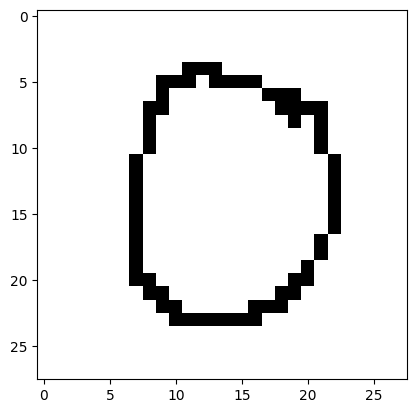

1/1 [==============================] - 0s 15ms/step
This digit is probably a 1


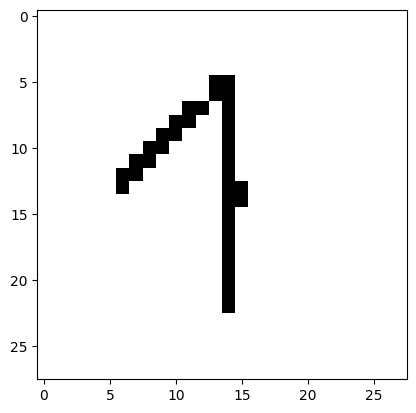

1/1 [==============================] - 0s 16ms/step
This digit is probably a 2


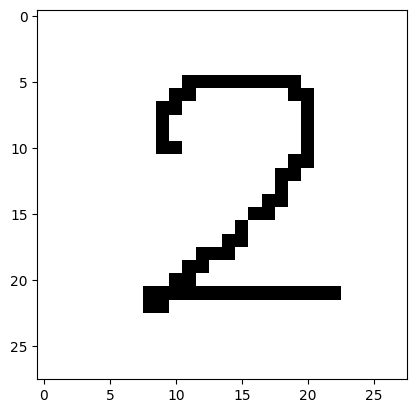

1/1 [==============================] - 0s 15ms/step
This digit is probably a 3


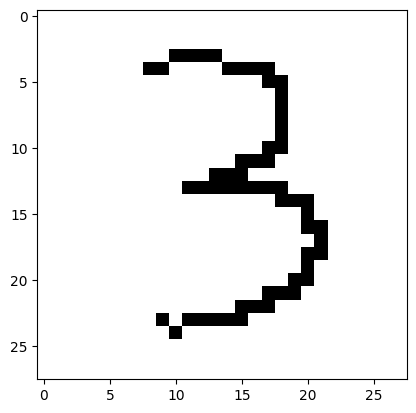

1/1 [==============================] - 0s 18ms/step
This digit is probably a 4


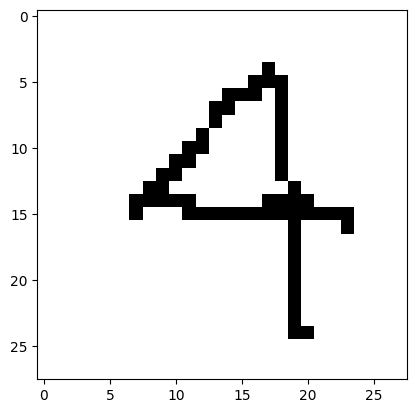

1/1 [==============================] - 0s 16ms/step
This digit is probably a 5


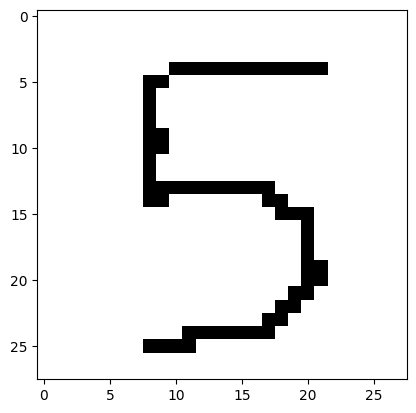

1/1 [==============================] - 0s 14ms/step
This digit is probably a 6


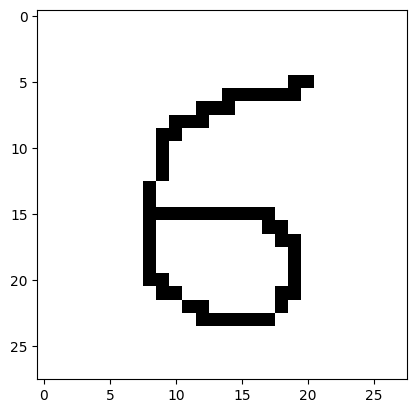

1/1 [==============================] - 0s 15ms/step
This digit is probably a 3


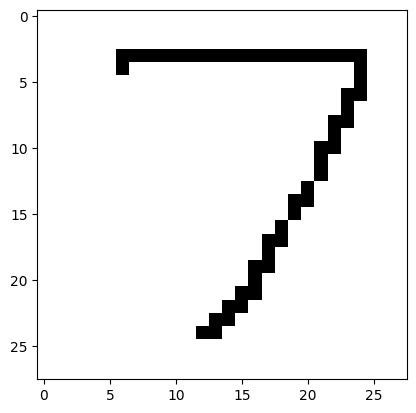

1/1 [==============================] - 0s 15ms/step
This digit is probably a 8


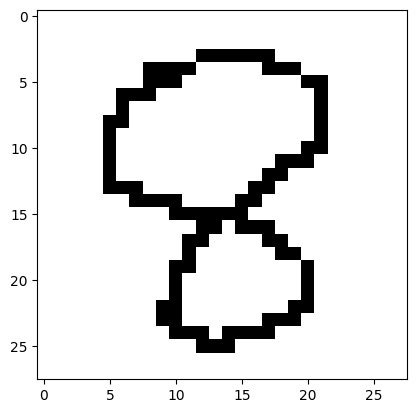

1/1 [==============================] - 0s 14ms/step
This digit is probably a 5


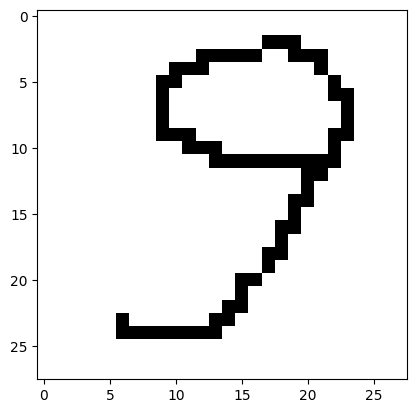

In [40]:
image_number = 0
while os.path.isfile(f"digit{image_number}.png"):
  try:
    img = cv2.imread(f"digit{image_number}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"This digit is probably a {np.argmax(prediction)}")
    plt.imshow(img[0] , cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error")
  finally:
    image_number +=1
